In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
from tensorflow import keras
from tensorflow.keras import layers

epoch_count = 30

In [2]:
user_number = 100
code_length = 50


In [3]:
estimator = keras.Sequential(
    [
        layers.Dense(user_number + code_length, activation="relu", name="layer1"),
        layers.Dense(user_number + code_length, activation="relu", name="layer2"),
        layers.Dense(user_number, activation="relu", name="layer3"),
    ],name = 'estimator'
)
# Call model on a test input
y = tf.ones((3, code_length))
x_hat = estimator(y)

In [4]:
estimator.name

'estimator'

In [5]:
var_num = 0
for i in range(6):
    var_num += estimator.weights[i].numpy().size
print(var_num)

45400


In [6]:
y = tf.ones((1, code_length))
x_hat = estimator(y)

In [8]:
estimator.summary()

Model: "estimator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 150)               7650      
_________________________________________________________________
layer2 (Dense)               (None, 150)               22650     
_________________________________________________________________
layer3 (Dense)               (None, 100)               15100     
Total params: 45,400
Trainable params: 45,400
Non-trainable params: 0
_________________________________________________________________


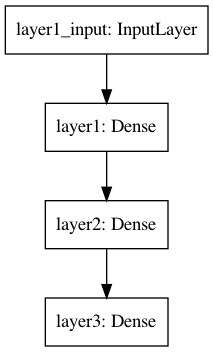

In [9]:
keras.utils.plot_model(estimator, "my_first_model.png")

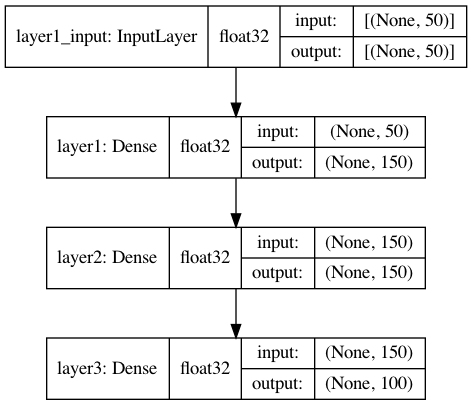

In [10]:
keras.utils.plot_model(estimator, "my_first_model_with_shape_info.png", show_shapes=True, show_dtype=True)

In [11]:
import data_tool as dt

In [14]:
signature_matrix = dt.get_random_binary_signature_matrix(user_number, code_length)

In [28]:
y_set, x_set, h_set = dt.get_dataset(1000000, signature_matrix, is_fading=1)
y_set = y_set.astype("float32")
x_set = x_set.astype("float32")
h_set = h_set.astype("float32")
y_test, x_test, h_test = dt.get_dataset(10000, signature_matrix, is_fading=1)
y_test = y_test.astype("float32")
x_test = x_test.astype("float32")
h_test = h_test.astype("float32")

In [33]:
estimator.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = estimator.fit(y_set, h_set, batch_size=1000, epochs=30, validation_split=0.2)

test_scores = estimator.evaluate(y_test, h_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/30
800/800 [==============================] - 5s 6ms/step - loss: 0.0836 - accuracy: 0.4209 - val_loss: 0.0808 - val_accuracy: 0.5061
Epoch 2/30
800/800 [==============================] - 5s 6ms/step - loss: 0.0807 - accuracy: 0.5121 - val_loss: 0.0798 - val_accuracy: 0.5252
Epoch 3/30
800/800 [==============================] - 5s 7ms/step - loss: 0.0801 - accuracy: 0.5197 - val_loss: 0.0801 - val_accuracy: 0.5212
Epoch 4/30
800/800 [==============================] - 5s 6ms/step - loss: 0.0799 - accuracy: 0.5219 - val_loss: 0.0793 - val_accuracy: 0.5302
Epoch 5/30
800/800 [==============================] - 5s 6ms/step - loss: 0.0798 - accuracy: 0.5256 - val_loss: 0.0795 - val_accuracy: 0.5284
Epoch 6/30
800/800 [==============================] - 5s 6ms/step - loss: 0.0797 - accuracy: 0.5245 - val_loss: 0.0795 - val_accuracy: 0.5292
Epoch 7/30
800/800 [==============================] - 4s 5ms/step - loss: 0.0794 - accuracy: 0.5262 - val_loss: 0.0799 - val_accuracy: 0.5234
Epoch 

In [32]:
estimator_big = keras.Sequential(
    [
        layers.Dense(user_number + code_length, activation="relu", name="layer1"),
        layers.Dense(user_number + code_length, activation="relu", name="layer2"),
        layers.Dense(user_number + code_length, activation="relu", name="layer3"),
        layers.Dense(user_number + code_length, activation="relu", name="layer4"),
        layers.Dense(user_number + code_length, activation="relu", name="layer5"),
        layers.Dense(user_number, activation="relu", name="layer6"),
    ],name = 'estimator_big'
)
# Call model on a test input
y = tf.ones((3, code_length))
x_hat = estimator(y)

In [34]:
estimator_big.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = estimator_big.fit(y_set, h_set, batch_size=1000, epochs=30, validation_split=0.2)

test_scores = estimator_big.evaluate(y_test, h_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/30
800/800 [==============================] - 10s 12ms/step - loss: 0.1163 - accuracy: 0.4272 - val_loss: 0.0659 - val_accuracy: 0.5759
Epoch 2/30
800/800 [==============================] - 9s 11ms/step - loss: 0.0566 - accuracy: 0.6008 - val_loss: 0.0487 - val_accuracy: 0.6057
Epoch 3/30
800/800 [==============================] - 9s 11ms/step - loss: 0.0461 - accuracy: 0.6164 - val_loss: 0.0411 - val_accuracy: 0.6300
Epoch 4/30
800/800 [==============================] - 9s 11ms/step - loss: 0.0398 - accuracy: 0.6309 - val_loss: 0.0388 - val_accuracy: 0.6314
Epoch 5/30
800/800 [==============================] - 9s 11ms/step - loss: 0.0354 - accuracy: 0.6455 - val_loss: 0.0323 - val_accuracy: 0.6607
Epoch 6/30
800/800 [==============================] - 9s 11ms/step - loss: 0.0324 - accuracy: 0.6575 - val_loss: 0.0312 - val_accuracy: 0.6614
Epoch 7/30
800/800 [==============================] - 9s 11ms/step - loss: 0.0299 - accuracy: 0.6690 - val_loss: 0.0292 - val_accuracy: 0.672

In [53]:
estimator_bn = keras.Sequential(
    [
        tf.keras.layers.BatchNormalization(),
        layers.Dense(user_number + code_length, activation="relu", name="layer1"),
        tf.keras.layers.BatchNormalization(),
        layers.Dense(user_number + code_length, activation="relu", name="layer2"),
        tf.keras.layers.BatchNormalization(),
        layers.Dense(user_number + code_length, activation="relu", name="layer3"),
        tf.keras.layers.BatchNormalization(),
        layers.Dense(user_number, activation="relu", name="layer4"),
    ],name = 'estimator_big'
)
# Call model on a test input
y = tf.ones((3, code_length))
x_hat = estimator_bn(y)

In [54]:
estimator_bn.summary()

Model: "estimator_big"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (3, 50)                   200       
_________________________________________________________________
layer1 (Dense)               (3, 150)                  7650      
_________________________________________________________________
batch_normalization_1 (Batch (3, 150)                  600       
_________________________________________________________________
layer2 (Dense)               (3, 150)                  22650     
_________________________________________________________________
batch_normalization_2 (Batch (3, 150)                  600       
_________________________________________________________________
layer3 (Dense)               (3, 150)                  22650     
_________________________________________________________________
batch_normalization_3 (Batch (3, 150)                

In [55]:
estimator_big.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = estimator_big.fit(y_set, h_set, batch_size=1000, epochs=30, validation_split=0.2)

test_scores = estimator_big.evaluate(y_test, h_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/30
800/800 [==============================] - 11s 12ms/step - loss: 0.0170 - accuracy: 0.7510 - val_loss: 0.0151 - val_accuracy: 0.7475
Epoch 2/30
800/800 [==============================] - 10s 13ms/step - loss: 0.0150 - accuracy: 0.7512 - val_loss: 0.0168 - val_accuracy: 0.7376
Epoch 3/30
800/800 [==============================] - 11s 14ms/step - loss: 0.0149 - accuracy: 0.7533 - val_loss: 0.0191 - val_accuracy: 0.7225
Epoch 4/30
800/800 [==============================] - 9s 11ms/step - loss: 0.0147 - accuracy: 0.7543 - val_loss: 0.0140 - val_accuracy: 0.7624
Epoch 5/30
800/800 [==============================] - 9s 11ms/step - loss: 0.0146 - accuracy: 0.7553 - val_loss: 0.0133 - val_accuracy: 0.7676
Epoch 6/30
800/800 [==============================] - 9s 11ms/step - loss: 0.0144 - accuracy: 0.7557 - val_loss: 0.0121 - val_accuracy: 0.7739
Epoch 7/30
800/800 [==============================] - 10s 12ms/step - loss: 0.0142 - accuracy: 0.7575 - val_loss: 0.0116 - val_accuracy: 0.

In [68]:
i = 10
tf.reduce_sum(h_set[0:i,:] - estimator(y_set[0:i,:]))/(y_set[0:i,:].shape[0])

<tf.Tensor: shape=(), dtype=float32, numpy=4.3653135>

In [105]:
tf.pow(tf.norm([[1.,2.],[1.,2.],[1., 1.]], 2, axis=1), 2)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([5.       , 5.       , 1.9999999], dtype=float32)>

In [ ]:
tf.reduce_sum(tf.pow(h_set[0:i,:], 2), 1)

In [104]:
tf.pow(tf.norm([[1.,2.],[1.,2.],[1., 1.]], 2, axis=1), 2)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([5.       , 5.       , 1.9999999], dtype=float32)>

In [89]:
tf.pow(tf.norm(h_set[0:i,:], 2, axis=1), 2)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([20.346529, 17.315304, 40.100193, 27.444567, 36.38774 , 25.764181,
       29.053734, 17.607437, 17.82607 , 18.471365], dtype=float32)>

In [102]:
tf.reduce_sum(tf.pow(h_set[0:i,:], 2), 1)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([20.346529, 17.315304, 40.1002  , 27.444563, 36.387737, 25.764185,
       29.053734, 17.607439, 17.826069, 18.471365], dtype=float32)>

In [93]:
tf.reduce_mean(tf.pow(tf.norm(h_set[0:i,:] - estimator(y_set[0:i,:]), 2, axis=1), 2)/tf.pow(tf.norm(h_set[0:i,:], 2, axis=1), 2))

<tf.Tensor: shape=(), dtype=float32, numpy=0.32440716>

In [100]:
10 * tf.math.log(tf.reduce_mean(tf.pow(tf.norm(h_set[0:i,:] - estimator(y_set[0:i,:]), 2, axis=1), 2)/tf.pow(tf.norm(h_set[0:i,:], 2, axis=1), 2)))/tf.math.log(10.)

<tf.Tensor: shape=(), dtype=float32, numpy=-4.889096>

In [ ]:
10 * tf.math.log(tf.reduce_mean(tf.pow(tf.norm(h_set[0:i,:] - estimator(y_set[0:i,:]), 2, axis=1), 2)/tf.pow(tf.norm(h_set[0:i,:], 2, axis=1), 2)))/tf.math.log(10.)

In [ ]:
eve += (np.power(np.linalg.norm(output[0]-aaa[i], 2), 2) / np.power(np.linalg.norm(aaa[i], 2), 2))

In [162]:
class NMSE_Accuracy(keras.metrics.Metric):
    def __init__(self, name="nmse_accuracy", **kwargs):
        super(NMSE_Accuracy, self).__init__(name=name, **kwargs)
        self.sum_nmse = self.add_weight(name="sum_nmse", initializer="zeros")
        self.sample_number = self.add_weight(name="sample_number", initializer="zeros")

    def update_state(self, y_true, y_pred, sample_weight=None):
        diff = y_pred - y_true
        fenmu = tf.reduce_sum(tf.pow(y_true, 2), 1)
        current_nmse = tf.reduce_sum(tf.reduce_sum(tf.pow(diff, 2), 1) / fenmu)
        current_nmse = tf.where(tf.math.is_nan(current_nmse)|tf.math.is_inf(current_nmse), tf.zeros_like(current_nmse), current_nmse)
        current_nmse = tf.cast(current_nmse, "float32")
        self.sum_nmse.assign_add(current_nmse)
#         current_sample_number = y_true.shape[0]
        current_sample_number = tf.math.count_nonzero(fenmu)
        current_sample_number = tf.cast(current_sample_number, "float32")
        self.sample_number.assign_add(current_sample_number)

    def result(self):
        return 10 * (tf.math.log(self.sum_nmse / self.sample_number) / tf.math.log(10.))

    def reset_states(self):
        # The state of the metric will be reset at the start of each epoch.
        self.sum_nmse.assign(0.0)
        self.sample_number.assign(0.0)


In [129]:
tf.math.is_nan(tf.constant([0,1])/tf.constant([0,1]))

<tf.Tensor: shape=(2,), dtype=bool, numpy=array([ True, False])>

In [160]:
temp = tf.constant([0,1,2,1,1])/tf.constant([0,1,3,0,1])
temp

<tf.Tensor: shape=(5,), dtype=float64, numpy=array([       nan, 1.        , 0.66666667,        inf, 1.        ])>

In [161]:
tf.where(tf.math.is_nan(temp)|tf.math.is_inf(temp), tf.zeros_like(temp), temp)

<tf.Tensor: shape=(5,), dtype=float64, numpy=array([0.        , 1.        , 0.66666667, 0.        , 1.        ])>

In [146]:
temp[temp < 1E308]

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([1.        , 0.66666667, 1.        ])>

In [163]:
estimator_bn.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.RMSprop(),
    metrics=NMSE_Accuracy(),
)

history = estimator_bn.fit(y_set, h_set, batch_size=1000, epochs=30, validation_split=0.2)

test_scores = estimator_bn.evaluate(y_test, h_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/30
800/800 [==============================] - 13s 14ms/step - loss: 0.0066 - nmse_accuracy: -15.6852 - val_loss: 0.0063 - val_nmse_accuracy: -15.8179
Epoch 2/30
800/800 [==============================] - 10s 13ms/step - loss: 0.0064 - nmse_accuracy: -15.7671 - val_loss: 0.0062 - val_nmse_accuracy: -15.8484
Epoch 3/30
800/800 [==============================] - 11s 13ms/step - loss: 0.0063 - nmse_accuracy: -15.8444 - val_loss: 0.0062 - val_nmse_accuracy: -15.8929
Epoch 4/30
800/800 [==============================] - 11s 13ms/step - loss: 0.0063 - nmse_accuracy: -15.8926 - val_loss: 0.0060 - val_nmse_accuracy: -16.0083
Epoch 5/30
800/800 [==============================] - 11s 13ms/step - loss: 0.0062 - nmse_accuracy: -15.9148 - val_loss: 0.0060 - val_nmse_accuracy: -16.0374
Epoch 6/30
800/800 [==============================] - 11s 13ms/step - loss: 0.0062 - nmse_accuracy: -15.9494 - val_loss: 0.0060 - val_nmse_accuracy: -16.0610
Epoch 7/30
800/800 [==============================] 

In [ ]:
gpu_options = tf.GPUOptions(allow_growth=True)
def get_sigma_by_snr(snr, ave_power, signal_l):
    sigma2 = ave_power / (signal_l * np.power(10.0, snr/10.0))
    sigma = np.sqrt(sigma2)
    return sigma

def get_final_result_for_detector(output):
    r = np.ones_like(output[0])
    for i in range(output[0].size):
        if output[0][i] <= 0.5:
            r[i] = 0
    return r

def get_final_result_for_decoder(output):
    r = np.ones_like(output[0])
    for i in range(output[0].size):
        if output[0][i] <= 0.05:
            r[i] = 0
    return r

def get_matrix(size, length):
    ma = 1-2*np.random.binomial(1,0.5, (size,length))
    mb = np.random.binomial(1,0.5, (size,length))
    return ma*mb

def get_batch(data_size, p, phi, total):
    phi = np.transpose(phi)
    x = np.random.binomial(n=1, p=p, size=(total,data_size))
    h_x = np.random.rayleigh(1, size=(total,data_size)) * x
    phi_h_x = np.dot(phi, h_x)
    phi_x = np.dot(phi, x)
    return np.transpose(phi_x), np.transpose(x), np.transpose(phi_h_x), np.transpose(h_x)

def get_avege_power(p, phi, total, test_time):
    phi = np.transpose(phi)
    sum=0
    for i in range(test_time):
        x = np.random.binomial(n=1, p=p, size=(total,1))
        phi_x = np.dot(phi, x)
        sum += np.power(np.linalg.norm(phi_x, ord=2), 2)
    return sum/test_time

In [ ]:
l = 50
total = 100
batch_size = 1000
p = 0.1
phi = np.array(get_matrix(total, l), 'float32')
ave_power = get_avege_power(p,phi,total,100000)
# Training Parameters
learning_rate = 0.001
display_step = 1000
train_sigma = get_sigma_by_snr(10, ave_power, l)
print(ave_power)
# Network Parameters
num_input = l # input of decoder
num_hidden_decoder = (l + total)# decoder layer num features
num_output = total # output of decoder or this NN

In [ ]:
# tf input
X1 = tf.placeholder("float", [None, num_input])
X2 = tf.placeholder("float", [None, num_output])

dc_label = tf.placeholder("float", [None, num_output])
dt_label = tf.placeholder("float", [None, num_output])

is_training = tf.placeholder_with_default(False,shape=[])

g_noise = tf.placeholder("float", [None, num_input])

weights = {
    'decoder_h0': tf.get_variable("decoder_h0", shape=[num_input, num_hidden_decoder], initializer=tf.contrib.layers.xavier_initializer()),
    'decoder_h1': tf.get_variable("decoder_h1", shape=[num_input + num_output, num_hidden_decoder], initializer=tf.contrib.layers.xavier_initializer()),
    'decoder_h2': tf.get_variable("decoder_h2", shape=[num_hidden_decoder, num_hidden_decoder], initializer=tf.contrib.layers.xavier_initializer()),
    'decoder_h3': tf.get_variable("decoder_h3", shape=[num_hidden_decoder, num_hidden_decoder], initializer=tf.contrib.layers.xavier_initializer()),
    'decoder_h4': tf.get_variable("decoder_h4", shape=[num_hidden_decoder, num_output], initializer=tf.contrib.layers.xavier_initializer()),
}

biases = {
    'decoder_b0': tf.get_variable("decoder_b0", shape=[num_hidden_decoder], initializer=tf.contrib.layers.xavier_initializer()),
    'decoder_b1': tf.get_variable("decoder_b1", shape=[num_hidden_decoder], initializer=tf.contrib.layers.xavier_initializer()),
    'decoder_b2': tf.get_variable("decoder_b2", shape=[num_hidden_decoder], initializer=tf.contrib.layers.xavier_initializer()),
    'decoder_b3': tf.get_variable("decoder_b3", shape=[num_hidden_decoder], initializer=tf.contrib.layers.xavier_initializer()), 
    'decoder_b4': tf.get_variable("decoder_b4", shape=[num_output], initializer=tf.contrib.layers.xavier_initializer()),
}

weights_detector = {
    'decoder_h0': tf.get_variable("decoder_h0_dt", shape=[num_input, num_hidden_decoder], initializer=tf.contrib.layers.xavier_initializer()),
    'decoder_h1': tf.get_variable("decoder_h1_dt", shape=[num_input + num_output, num_hidden_decoder], initializer=tf.contrib.layers.xavier_initializer()),
    'decoder_h2': tf.get_variable("decoder_h2_dt", shape=[num_hidden_decoder, num_hidden_decoder], initializer=tf.contrib.layers.xavier_initializer()),
    'decoder_h3': tf.get_variable("decoder_h3_dt", shape=[num_hidden_decoder, num_hidden_decoder], initializer=tf.contrib.layers.xavier_initializer()),
    'decoder_h4': tf.get_variable("decoder_h4_dt", shape=[num_hidden_decoder, num_output], initializer=tf.contrib.layers.xavier_initializer()),
}

biases_detector = {
    'decoder_b0': tf.get_variable("decoder_b0_dt", shape=[num_hidden_decoder], initializer=tf.contrib.layers.xavier_initializer()),
    'decoder_b1': tf.get_variable("decoder_b1_dt", shape=[num_hidden_decoder], initializer=tf.contrib.layers.xavier_initializer()),
    'decoder_b2': tf.get_variable("decoder_b2_dt", shape=[num_hidden_decoder], initializer=tf.contrib.layers.xavier_initializer()),
    'decoder_b3': tf.get_variable("decoder_b3_dt", shape=[num_hidden_decoder], initializer=tf.contrib.layers.xavier_initializer()), 
    'decoder_b4': tf.get_variable("decoder_b4_dt", shape=[num_output], initializer=tf.contrib.layers.xavier_initializer()),
}

In [ ]:
# 构建decoder
def estimator_0(x):
    bn_input = tf.layers.batch_normalization(x, training=is_training)
    layer_1 = tf.nn.relu(tf.add(tf.matmul(bn_input, weights['decoder_h0']),
                                biases['decoder_b0']))
    return layer_1
    
def detector_0(x):
    bn_input = tf.layers.batch_normalization(x, training=is_training)
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(bn_input, weights_detector['decoder_h0']),
                                biases_detector['decoder_b0']))
    return layer_1

def g1_estimator(x):
    bn_input = tf.layers.batch_normalization(x, training=is_training)
    layer_1 = tf.nn.relu(tf.add(tf.matmul(bn_input, weights['decoder_h1']),
                                biases['decoder_b1']))
    bn_layer_1 = tf.layers.batch_normalization(layer_1, training=is_training)
    layer_2 = tf.nn.relu(tf.add(tf.matmul(bn_layer_1, weights['decoder_h2']),
                                biases['decoder_b2']))
    bn_layer_2 = tf.layers.batch_normalization(layer_2, training=is_training)
    layer_3 = tf.nn.relu(tf.add(tf.matmul(bn_layer_2, weights['decoder_h3']),
                                biases['decoder_b3']))
    bn_layer_3 = tf.layers.batch_normalization(layer_3, training=is_training)
    layer_4 = tf.nn.relu(tf.add(tf.matmul(bn_layer_3, weights['decoder_h4']),
                                biases['decoder_b4']))
    return layer_4

def g1_detector(x):
    bn_input = tf.layers.batch_normalization(x, training=is_training)
    layer_1 = tf.nn.relu(tf.add(tf.matmul(bn_input, weights_detector['decoder_h1']),
                                biases_detector['decoder_b1']))
    bn_layer_1 = tf.layers.batch_normalization(layer_1, training=is_training)
    layer_2 = tf.nn.relu(tf.add(tf.matmul(bn_layer_1, weights_detector['decoder_h2']),
                                biases_detector['decoder_b2']))
    bn_layer_2 = tf.layers.batch_normalization(layer_2, training=is_training)
    layer_3 = tf.nn.relu(tf.add(tf.matmul(bn_layer_2, weights_detector['decoder_h3']),
                                biases_detector['decoder_b3']))
    bn_layer_3 = tf.layers.batch_normalization(layer_3, training=is_training)
    layer_4 = tf.nn.sigmoid(tf.add(tf.matmul(bn_layer_3, weights_detector['decoder_h4']),
                                biases_detector['decoder_b4']))
    return layer_4



In [ ]:
# 构建模型
p_1_p = tf.cond(tf.equal(is_training, tf.constant(True)), lambda:tf.ones([batch_size, num_output]), lambda:[tf.ones([1, num_output])])
p_2_p = tf.cond(tf.equal(is_training, tf.constant(True)), lambda:tf.zeros([batch_size, num_output]), lambda:[tf.zeros([1, num_output])])

mixer_input_d = estimator_0(X1 + g_noise)
mixer_input_e = detector_0(X1 + g_noise)

# with tf.variable_scope("One_Detector"):
g1_detector_op = g1_detector(mixer_input_d)
# with tf.variable_scope("One"):
g1_estimator_op = g1_estimator(mixer_input_e)
    
# g1_s_decoder_op = tf.multiply(g1_decoder_op, g1_detector_op)
# p_2 = (X1 + g_noise) - tf.matmul(g1_s_decoder_op, phi)
g2_mixer_input_d = tf.concat([g1_estimator_op, X1 + g_noise], 1)
g2_mixer_input_e = tf.concat([g1_detector_op, X1 + g_noise], 1)

# with tf.variable_scope("Two"):
g2_estimator_op = g1_estimator(g2_mixer_input_e)
# with tf.variable_scope("Two_Detector"):
g2_detector_op = g1_detector(g2_mixer_input_d)

g3_mixer_input_e = tf.concat([g2_detector_op, X1 + g_noise], 1)
g3_mixer_input_d = tf.concat([g2_estimator_op, X1 + g_noise], 1)

# with tf.variable_scope("Three"):
g3_estimator_op = g1_estimator(g3_mixer_input_e)
# with tf.variable_scope("Three_Detector"):
g3_detector_op = g1_detector(g3_mixer_input_d)


g4_mixer_input_e = tf.concat([g3_detector_op, X1 + g_noise], 1)
g4_mixer_input_d = tf.concat([g3_estimator_op, X1 + g_noise], 1)

# with tf.variable_scope("Four"):
g4_estimator_op = g1_estimator(g4_mixer_input_e)
# with tf.variable_scope("Four_Detector"):
g4_detector_op = g1_detector(g4_mixer_input_d)


g5_mixer_input_e = tf.concat([g4_detector_op, X1 + g_noise], 1)
g5_mixer_input_d = tf.concat([g4_estimator_op, X1 + g_noise], 1)

# with tf.variable_scope("Five"):
g5_estimator_op = g1_estimator(g5_mixer_input_e)
# with tf.variable_scope("Five_Detector"):
g5_detector_op = g1_detector(g5_mixer_input_d)



# #6
# p_6 = (X1 + g_noise) - tf.matmul(g5_s_decoder_op, phi)
# g6_mixer_input = tf.concat([g5_s_decoder_op, p_6], 1)

# # with tf.variable_scope("Five"):
# g6_decoder_op = g1_decoder(g6_mixer_input)

# # with tf.variable_scope("Five_Detector"):
# g6_detector_op = g1_detector(g6_mixer_input)

# g6_s_decoder_op = tf.multiply(g6_decoder_op, g6_detector_op)

# #7
# p_7 = (X1 + g_noise) - tf.matmul(g6_s_decoder_op, phi)
# g7_mixer_input = tf.concat([g6_s_decoder_op, p_7], 1)

# # with tf.variable_scope("Five"):
# g7_decoder_op = g1_decoder(g7_mixer_input)

# # with tf.variable_scope("Five_Detector"):
# g7_detector_op = g1_detector(g7_mixer_input)

# g7_s_decoder_op = tf.multiply(g7_decoder_op, g7_detector_op)

# #8
# p_8 = (X1 + g_noise) - tf.matmul(g7_s_decoder_op, phi)
# g8_mixer_input = tf.concat([g7_s_decoder_op, p_8], 1)

# # with tf.variable_scope("Five"):
# g8_decoder_op = g1_decoder(g8_mixer_input)

# # with tf.variable_scope("Five_Detector"):
# g8_detector_op = g1_detector(g8_mixer_input)

# g8_s_decoder_op = tf.multiply(g8_decoder_op, g8_detector_op)

In [ ]:
# decoder_op = g3_decoder_op
# detector_op = g3_detector_op

# 预测
# y_pred_dc = decoder_op
# y_pred_dt = detector_op
y_true_dc = dc_label
y_true_dt = dt_label
 
# loss函数和优化器
g1_mse_l_dc = tf.losses.mean_squared_error(y_true_dc, g1_estimator_op)
g1_mse_l_dt = tf.losses.mean_squared_error(y_true_dt, g1_detector_op)

g2_mse_l_dc = tf.losses.mean_squared_error(y_true_dc, g2_estimator_op)
g2_mse_l_dt = tf.losses.mean_squared_error(y_true_dt, g2_detector_op)


g3_mse_l_dc = tf.losses.mean_squared_error(y_true_dc, g3_estimator_op)
g3_mse_l_dt = tf.losses.mean_squared_error(y_true_dt, g3_detector_op)

g4_mse_l_dc = tf.losses.mean_squared_error(y_true_dc, g4_estimator_op)
g4_mse_l_dt = tf.losses.mean_squared_error(y_true_dt, g4_detector_op)

g5_mse_l_dc = tf.losses.mean_squared_error(y_true_dc, g5_estimator_op)
g5_mse_l_dt = tf.losses.mean_squared_error(y_true_dt, g5_detector_op)

# g6_mse_l_dc = tf.losses.mean_squared_error(y_true_dc, g6_decoder_op)
# g6_mse_l_dt = tf.losses.mean_squared_error(y_true_dt, g6_detector_op)

# g7_mse_l_dc = tf.losses.mean_squared_error(y_true_dc, g7_decoder_op)
# g7_mse_l_dt = tf.losses.mean_squared_error(y_true_dt, g7_detector_op)

# g8_mse_l_dc = tf.losses.mean_squared_error(y_true_dc, g8_decoder_op)
# g8_mse_l_dt = tf.losses.mean_squared_error(y_true_dt, g8_detector_op)


mul_mse_l_dc = g1_mse_l_dc + g2_mse_l_dc + g3_mse_l_dc + g4_mse_l_dc + g5_mse_l_dc
mul_mse_l_dt = g1_mse_l_dt + g2_mse_l_dt + g3_mse_l_dt + g4_mse_l_dt + g5_mse_l_dt

# mul_mse_l_dc = g1_mse_l_dc + g2_mse_l_dc + g3_mse_l_dc + g4_mse_l_dc + g5_mse_l_dc + g6_mse_l_dc + g7_mse_l_dc + g8_mse_l_dc
# mul_mse_l_dt = g1_mse_l_dt + g2_mse_l_dt + g3_mse_l_dt + g4_mse_l_dt + g5_mse_l_dt + g6_mse_l_dt + g7_mse_l_dt + g8_mse_l_dt

mul_mse_l = mul_mse_l_dc + mul_mse_l_dt

update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)

mul_optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(mul_mse_l)



init = tf.global_variables_initializer()

In [ ]:
# Start Training
# Start a new TF session
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

# Run the initializer
sess.run(init)

ini_weights = sess.run(weights)

ini_biases = sess.run(biases)

now_step = 0
now_step_dt = 0

final_loss = 0

cost_list = []
cost_list_1=[]
cost_list_2=[]
cost_list_3=[]
cost_list_4=[]
cost_list_5=[]
cost_list_dt = []
cost_list_dt_1 = []
cost_list_dt_2 = []
cost_list_dt_3 = []
cost_list_dt_4 = []
cost_list_dt_5 = []
step_list = []
step_list_for_test = []
result_list = []
step_list_dt = []

In [ ]:
for m in range (epoch_count*5):
#     for i in range(int(1000000 / batch_size)):
    for i in range(500):
        phi_x, x, phi_h_x, h_x = get_batch(batch_size, p, phi, total)
        _, _, l_dc, l_dc_1, l_dc_2, l_dc_3, l_dc_4, l_dc_5, l_dt, l_dt_1, l_dt_2, l_dt_3, l_dt_4, l_dt_5 = sess.run([update_ops, mul_optimizer, mul_mse_l_dc, g1_mse_l_dc, g2_mse_l_dc, g3_mse_l_dc, g4_mse_l_dc, g5_mse_l_dc, mul_mse_l_dt, g1_mse_l_dt, g2_mse_l_dt, g3_mse_l_dt, g4_mse_l_dt, g5_mse_l_dt], feed_dict={X1: phi_h_x, dc_label:h_x,
                                                             X2:h_x, dt_label: x, g_noise: np.random.normal(loc=0, scale=train_sigma, size=(batch_size, num_input)), is_training: True})
        now_step += 1
        # Display logs per step
        if i % display_step == 0:
            now = time.ctime()
            cnvtime = time.strptime(now)
            print(time.strftime("%Y/%m/%d %H:%M", cnvtime))
            print('Step %i: Minibatch Loss: %f\n %f\t%f\t%f\t%f\t%f' % (now_step, l_dc, l_dc_1, l_dc_2, l_dc_3, l_dc_4, l_dc_5))
            print('%f\n %f\t%f\t%f\t%f\t%f' % (l_dt, l_dt_1, l_dt_2, l_dt_3, l_dt_4, l_dt_5))
            step_list.append(now_step)
            cost_list.append(l_dc)
            cost_list_1.append(l_dc_1)
            cost_list_2.append(l_dc_2)
            cost_list_3.append(l_dc_3)
            cost_list_4.append(l_dc_4)
            cost_list_5.append(l_dc_5)
            cost_list_dt.append(l_dt)
            cost_list_dt_1.append(l_dt_1)
            cost_list_dt_2.append(l_dt_2)
            cost_list_dt_3.append(l_dt_3)
            cost_list_dt_4.append(l_dt_4)
            cost_list_dt_5.append(l_dt_5)
        final_loss = l_dc
now = time.ctime()
cnvtime = time.strptime(now)
print(time.strftime("%Y/%m/%d %H:%M", cnvtime))
print('This training is end, and final cost is %f\t%f' % (final_loss,l_dt))

In [ ]:
# p1_x = step_list[-40:]
# p1_y = cost_list[-40:]
p1_x = step_list
p1_y = cost_list
plt.plot(p1_x, cost_list_dt, label='detector')
plt.plot(p1_x, p1_y, label='estimator')
plt.grid()
plt.yscale('log')
plt.xlabel("batches")
plt.ylabel("loss")
# plt.xlim(right = 27500)
plt.legend()
# plt.savefig('T_C_2.eps')
plt.show()

In [ ]:
v_sigma = get_sigma_by_snr(10, ave_power, l)
error_bits = 0
error_blocks = 0
eve = 0
loop_time = 1000
skip_time = 0
phi_x, x, phi_h_x, h_x = get_batch(1, p, phi, total)
output_x_o = np.ones_like(h_x)
# for i in range(x.shape[0]):
for i in range(loop_time):
    phi_x, x, phi_h_x, h_x = get_batch(1, p, phi, total)
    if (np.linalg.norm(x, 2)) == 0:
        skip_time += 1
        continue

    output = sess.run(g5_estimator_op, feed_dict={X1: phi_h_x,
                                               g_noise: np.random.normal(loc=0, scale=v_sigma, size=(1, num_input)),
                                               is_training: False})
    output_2 = sess.run(g5_detector_op, feed_dict={X1: phi_h_x,
                                               g_noise: np.random.normal(loc=0, scale=v_sigma, size=(1, num_input)),
                                               is_training: False})
    output = output * output_2
    one_one = get_final_result_for_decoder(output)
    output_x_o = output[0]
#     result = get_final_result(output)
#     print('output first')
#     print(output)
#     print(h_x[i])
    error_bits += np.linalg.norm(x - one_one,1)
    if error_bits != 0:
        error_blocks += 1
    eve += (np.power(np.linalg.norm(output[0]-h_x, 2), 2) / np.power(np.linalg.norm(h_x, 2), 2))

print(skip_time)
eve = eve / (loop_time-skip_time)
r_01 = 10 * np.log10(eve)
print(r_01)
print(error_bits/((loop_time-skip_time)*total))

In [ ]:
v_sigma = get_sigma_by_snr(20, ave_power, l)
error_bits = 0
error_blocks = 0
eve = 0
loop_time = 1000
skip_time = 0
phi_x, x, phi_h_x, h_x = get_batch(1, p, phi, total)
output_x_o = np.ones_like(h_x)
# for i in range(x.shape[0]):
for i in range(loop_time):
    phi_x, x, phi_h_x, h_x = get_batch(1, p, phi, total)
    if (np.linalg.norm(x, 2)) == 0:
        skip_time += 1
        continue

    output = sess.run(g5_estimator_op, feed_dict={X1: phi_h_x,
                                               g_noise: np.random.normal(loc=0, scale=v_sigma, size=(1, num_input)),
                                               is_training: False})
    output_2 = sess.run(g5_detector_op, feed_dict={X1: phi_h_x,
                                               g_noise: np.random.normal(loc=0, scale=v_sigma, size=(1, num_input)),
                                               is_training: False})
    output = output * output_2
    one_one = get_final_result_for_decoder(output)
    output_x_o = output[0]
#     result = get_final_result(output)
#     print('output first')
#     print(output)
#     print(h_x[i])
    error_bits += np.linalg.norm(x - one_one,1)
    if error_bits != 0:
        error_blocks += 1
    eve += (np.power(np.linalg.norm(output[0]-h_x, 2), 2) / np.power(np.linalg.norm(h_x, 2), 2))

print(skip_time)
eve = eve / (loop_time-skip_time)
r_01 = 10 * np.log10(eve)
print(r_01)
print(error_bits/((loop_time-skip_time)*total))

In [ ]:
detector_output = n_phi_h_x
bbb= n_x
aaa = n_h_x
v_sigma = get_sigma_by_snr(10, ave_power, l)
error_bits = 0
error_blocks = 0
eve = 0
loop_time = 100000
skip_time = 0
output_x_o = np.ones_like(n_h_x)
# for i in range(x.shape[0]):
for i in range(loop_time):
    if (np.linalg.norm(bbb[i], 2)) == 0:
        skip_time += 1
        continue

    output = sess.run(g5_estimator_op, feed_dict={X1: [detector_output[i]],
                                               g_noise: np.random.normal(loc=0, scale=v_sigma, size=(1, num_input)),
                                               is_training: False})
    output_2 = sess.run(g5_detector_op, feed_dict={X1: [detector_output[i]],
                                               g_noise: np.random.normal(loc=0, scale=v_sigma, size=(1, num_input)),
                                               is_training: False})
    output = output * output_2
    output_x_o[i] = output[0]
#     result = get_final_result(output)
#     print('output first')
#     print(output)
#     print(h_x[i])
    eve += (np.power(np.linalg.norm(output[0]-aaa[i], 2), 2) / np.power(np.linalg.norm(aaa[i], 2), 2))

print(skip_time)
eve = eve / (loop_time-skip_time)
r_01 = 10 * np.log10(eve)
print(r_01)